<a href="https://colab.research.google.com/github/SamarthJ03/Supply-Chain-Optimzation/blob/main/Supply_chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Required Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

**Loading Dataset And Exploring the Data**

In [4]:
fmcg = pd.read_csv("/content/FMCG_data.csv")

In [5]:
fmcg.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [6]:
fmcg.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,24010.000000,13119.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.089040,0.773680,3.104200,4985.711560,42.418120,0.098160,0.054640,0.656880,163.537320,28.944398,2009.383185,17.130440,0.303280,3.482040,18.812280,22102.632920
std,2.606612,1.199449,1.141663,1052.825252,16.064329,0.297537,0.227281,0.474761,62.718609,7.872534,7.528230,9.161108,0.459684,1.690335,8.632382,11607.755077
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,2.000000,0.000000,2.000000,4313.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13059.000000
50%,4.000000,0.000000,3.000000,4859.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,21.000000,22101.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [7]:
fmcg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [8]:
fmcg.duplicated().sum()

0

No duplicates in the dataset

In [9]:
fmcg.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

Columns :-

*  workers_num - representing the numbers of worker in each workhouse
*  wh_est_year - representing the year in which the warehouse was estabilished
*  approved_wh_govt_certificate - representing the government certification of each warehouse

Contains **NULL** values



In [10]:
fmcg['approved_wh_govt_certificate'].value_counts()

approved_wh_govt_certificate
C     5501
B+    4917
B     4812
A     4671
A+    4191
Name: count, dtype: int64

Most number of warehouses have C certification but the certification of a warehouse will depend on many factors so assuming that the warehouses with null values have C verification is not appropriate and will increase the bias in data so better to drop the na values.

In [11]:
fmcg = fmcg[fmcg['approved_wh_govt_certificate'].notna()]

In [12]:
fmcg.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       958
wh_est_year                     11446
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate        0
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [13]:
fmcg['wh_est_year'].value_counts()

wh_est_year
2000.0    551
2006.0    541
2002.0    533
2014.0    531
2007.0    528
2001.0    518
2004.0    515
2008.0    509
2016.0    507
2019.0    507
1998.0    507
2015.0    502
2013.0    502
2010.0    499
2018.0    498
2012.0    497
2020.0    496
2005.0    489
2017.0    488
2011.0    486
2009.0    485
1999.0    482
2003.0    469
1997.0    329
2021.0    313
1996.0    191
2022.0    173
Name: count, dtype: int64

In [14]:
fmcg.drop(columns=['wh_est_year'], inplace=True)

<ipython-input-14-885070799ce0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fmcg.drop(columns=['wh_est_year'], inplace=True)


Since almost half of the values in the feature **wh_est_year** are null it is better to drop this feature

In [15]:
print(fmcg['workers_num'].max())
print(fmcg['workers_num'].min())
print(fmcg["workers_num"].mean())
print(fmcg["workers_num"].median())

98.0
10.0
28.941644333016338
28.0


In [16]:
fmcg.dropna(inplace=True)

Number of workers in warehouse will depend on many factors such as its distance from hub,its location,how many distributors it is connected to etc.So selecting median to fill na values will not capture these relationships. Using a Regression model to fill these models is a good way but may overfit the training data. So considering the low number of null values i dropped the null values  

**Preprocessing and Building Model**

In [17]:
fmcg.drop(columns=["Ware_house_ID","WH_Manager_ID"],inplace=True)

Dropping unnecessary columns

In [18]:
fmcg.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,1,91,29.0,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,0,1,210,31.0,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,0,161,37.0,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,0,0,103,21.0,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,0,1,112,25.0,18,0,C,6,24,24071


<Axes: >

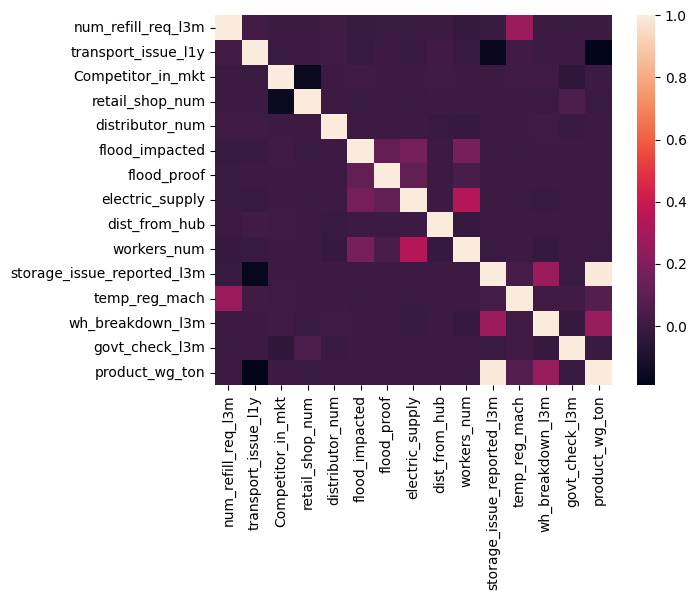

In [53]:
sns.heatmap(fmcg.select_dtypes(include=['int64','float64']).corr())

Looking into correlations with target **product_wg_ton**
we can see that the column **storage_issue_reported_l3m** is highly correlated with the target.

In [25]:
X = fmcg.drop(columns=['product_wg_ton'])
y = fmcg['product_wg_ton']

Separating Features and Target

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23134 entries, 0 to 24999
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 23134 non-null  object 
 1   WH_capacity_size              23134 non-null  object 
 2   zone                          23134 non-null  object 
 3   WH_regional_zone              23134 non-null  object 
 4   num_refill_req_l3m            23134 non-null  int64  
 5   transport_issue_l1y           23134 non-null  int64  
 6   Competitor_in_mkt             23134 non-null  int64  
 7   retail_shop_num               23134 non-null  int64  
 8   wh_owner_type                 23134 non-null  object 
 9   distributor_num               23134 non-null  int64  
 10  flood_impacted                23134 non-null  int64  
 11  flood_proof                   23134 non-null  int64  
 12  electric_supply               23134 non-null  int64  
 13  dist_f

In [27]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

Encoding the Categorical Data

In [28]:
le = LabelEncoder()
oe = OrdinalEncoder()
ohe = OneHotEncoder()

In [29]:
X['Location_type'] = le.fit_transform(X['Location_type'])

In [30]:
X['wh_owner_type'] = le.fit_transform(X['wh_owner_type'])

In [31]:
X['WH_capacity_size'] = oe.fit_transform(X[['WH_capacity_size']])

In [32]:
X['approved_wh_govt_certificate'] = oe.fit_transform(X[['approved_wh_govt_certificate']])

In [33]:
X = pd.get_dummies(X,columns=['zone',"WH_regional_zone"],dtype=int,drop_first=True)

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23134 entries, 0 to 24999
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 23134 non-null  int64  
 1   WH_capacity_size              23134 non-null  float64
 2   num_refill_req_l3m            23134 non-null  int64  
 3   transport_issue_l1y           23134 non-null  int64  
 4   Competitor_in_mkt             23134 non-null  int64  
 5   retail_shop_num               23134 non-null  int64  
 6   wh_owner_type                 23134 non-null  int64  
 7   distributor_num               23134 non-null  int64  
 8   flood_impacted                23134 non-null  int64  
 9   flood_proof                   23134 non-null  int64  
 10  electric_supply               23134 non-null  int64  
 11  dist_from_hub                 23134 non-null  int64  
 12  workers_num                   23134 non-null  float64
 13  storag

Scaling the data to perform **Linear Regression**

In [35]:
from sklearn.preprocessing import StandardScaler
x_sc = StandardScaler().fit_transform(X)

Separating the scaled dataset into training and test datasets

In [36]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV,cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size=0.2,random_state=42)

**Linear Regression**

In [37]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
Lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
print(cross_val_score(Lr,x_train,y_train,cv=5,scoring='neg_root_mean_squared_error').mean())
print(cross_val_score(Lr,x_train,y_train,cv=5,scoring='r2').mean())

-1394.0724625679172
0.9849687140658926


In [38]:
from sklearn.metrics import mean_squared_error
lr2 = LinearRegression()
lr2.fit(x_train,y_train)
y_pred = lr2.predict(x_test)
print(lr2.score(x_test,y_test))
print(mean_squared_error(y_test, y_pred, squared=False))

0.984755670038873
1388.9061899367464


**Ridge Regression**

In [39]:
param_grid = {'alpha' : [0.01,0.1,0.001,1,10]}

ridge_grid = GridSearchCV(ridge,param_grid,cv=5,scoring='neg_root_mean_squared_error')
ridge_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 0.001, 1, 10]},
             scoring='neg_root_mean_squared_error')

Using **GridSearchCV** to find best value for regularization parameter

In [40]:
print(ridge_grid.best_score_)
print(ridge_grid.best_params_)

-1394.0713400168463
{'alpha': 1}


**Lasso Regression**

In [41]:
lasso_grid = GridSearchCV(lasso,param_grid,cv=5,scoring='neg_root_mean_squared_error')
lasso_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 0.001, 1, 10]},
             scoring='neg_root_mean_squared_error')

In [42]:
print(lasso_grid.best_score_)
print(lasso_grid.best_params_)

-1393.0033900484348
{'alpha': 10}


In [43]:
lasso_model = lasso_grid.best_estimator_
lasso_model.fit(x_train,y_train)
y_lasso = lasso_model.predict(x_test)
print(lasso_model.score(x_test,y_test))
print(mean_squared_error(y_test, y_lasso, squared=False))

0.9847608012929342
1388.6724167774441


**Random Forest**

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    "max_features" :['sqrt', 'log2', None]
}

rf_grid = RandomizedSearchCV(rf,params,cv=5,scoring='neg_root_mean_squared_error')
rf_grid.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   scoring='neg_root_mean_squared_error')

In [45]:
print(rf_grid.best_score_)
print(rf_grid.best_params_)

-854.8869451692906
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10}


In [46]:
rf_model = rf_grid.best_estimator_
rf_model.fit(x_train,y_train)
y_rf = rf_model.predict(x_test)
print(rf_model.score(x_test,y_test))
print(mean_squared_error(y_test, y_rf, squared=False))

0.9942099399313908
855.9734177457038


Looking at Feature importance we can see that the most important feature for determining the **product supply** are the **storage issues** faced by the warehouses in **last 3 months**.The Correlation matrix also showed that it was the feature with highest correlation with target.

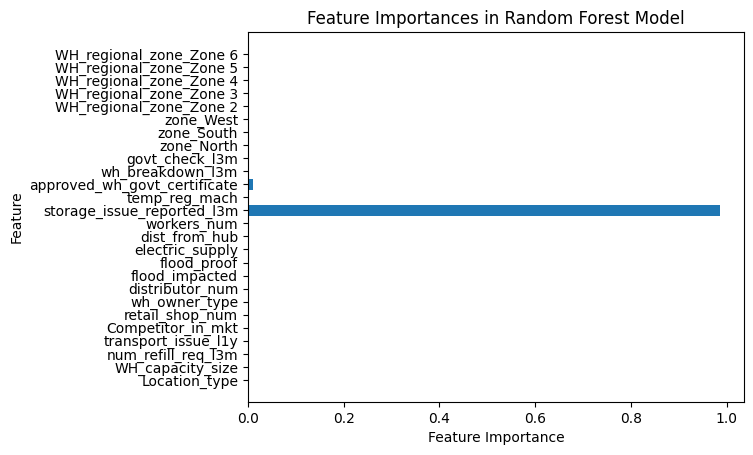

In [47]:
plt.barh(X.columns, rf_model.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances in Random Forest Model")
plt.show()

**XgBoost**

In [48]:
import xgboost
xgb = xgboost.XGBRegressor()
param_grid = {
    'n_estimators': [50, 100, 200,None],
    'learning_rate': [0.01, 0.1, 0.3,None],
    'max_depth': [3, 5, 7,None],
    'min_child_weight': [1, 3, 5,None],
    'gamma': [0, 0.1, 0.2,None],
    'subsample': [0.6, 0.8, 1.0,None],
    'colsample_bytree': [0.6, 0.8, 1.0,None]
}
xgb_grid = RandomizedSearchCV(xgb,param_grid,cv=5,scoring='neg_root_mean_squared_error')
xgb_grid.fit(x_train,y_train)



RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0,
                                                             None],
                                        'gamma': [0, 0.1, 0.2, None],
                                        'learning_rate': [0.01, 0.1, 0.3, None],
                                        'max_depth': [3, 5, 7, None],
                                        'min_child_weight': [1, 3, 5, None],
                                        'n_estimators': [50, 100, 200, None],
                                        'subsample': [0.6, 0.8, 1.0, None]},
                   scoring='neg_root_mean_squared_error')

In [49]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

-829.3639255448315
{'subsample': 0.8, 'n_estimators': None, 'min_child_weight': None, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': None, 'colsample_bytree': 1.0}


In [50]:
xg_model = xgb_grid.best_estimator_
xg_model.fit(x_train,y_train)
y_xg = xg_model.predict(x_test)
print(xg_model.score(x_test,y_test))
print(mean_squared_error(y_test, y_xg, squared=False))

0.9945596499004341
829.7211630825415


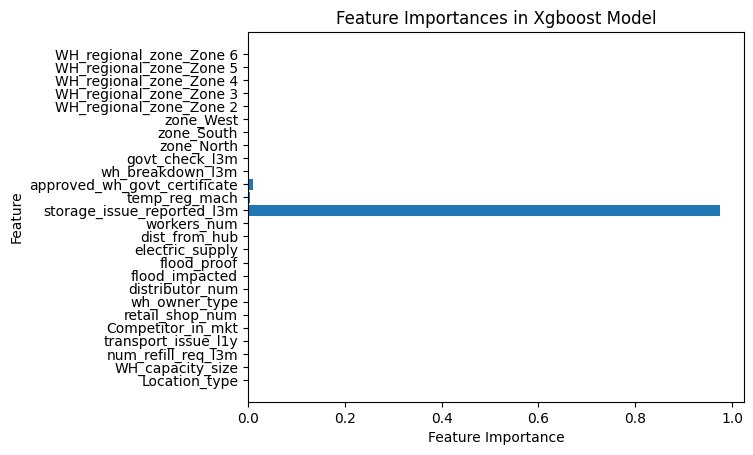

In [52]:
plt.barh(X.columns, xg_model.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances in Xgboost Model")
plt.show()

**Building Models without scaling data**

In [54]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV,cross_val_score
x_tr,x_ts,y_tr,y_ts = train_test_split(X,y,test_size=0.2,random_state=42)

**Random Forest**

In [57]:
rf2 = RandomForestRegressor()
rf2_grid = RandomizedSearchCV(rf2,params,cv=5,scoring='neg_root_mean_squared_error')
rf2_grid.fit(x_tr,y_tr)
print(rf2_grid.best_score_)
print(rf2_grid.best_params_)
rf2_model = rf2_grid.best_estimator_
rf2_model.fit(x_tr,y_tr)
y_rf2 = rf2_model.predict(x_ts)
print(rf2_model.score(x_ts,y_ts))
print(mean_squared_error(y_ts, y_rf2, squared=False))

-855.6790200794214
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10}
0.9942298969525828
854.4969714837604


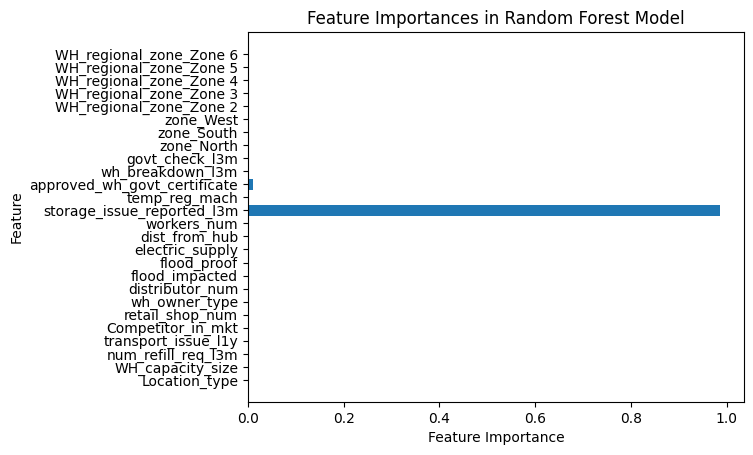

In [58]:
plt.barh(X.columns, rf2_model.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances in Random Forest Model")
plt.show()

**XGBOOST**

In [59]:
xgb2 = xgboost.XGBRegressor()
xgb2_grid = RandomizedSearchCV(xgb2,param_grid,cv=5,scoring='neg_root_mean_squared_error')
xgb2_grid.fit(x_tr,y_tr)
print(xgb2_grid.best_score_)
print(xgb2_grid.best_params_)
xgb2_model = xgb2_grid.best_estimator_
xgb2_model.fit(x_tr,y_tr)
y_xg2 = xgb2_model.predict(x_ts)
print(xgb2_model.score(x_ts,y_ts))
print(mean_squared_error(y_ts, y_xg2, squared=False))

-831.130967342734
{'subsample': 0.6, 'n_estimators': 100, 'min_child_weight': None, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 1.0}
0.9945613442521117
829.5919481519637


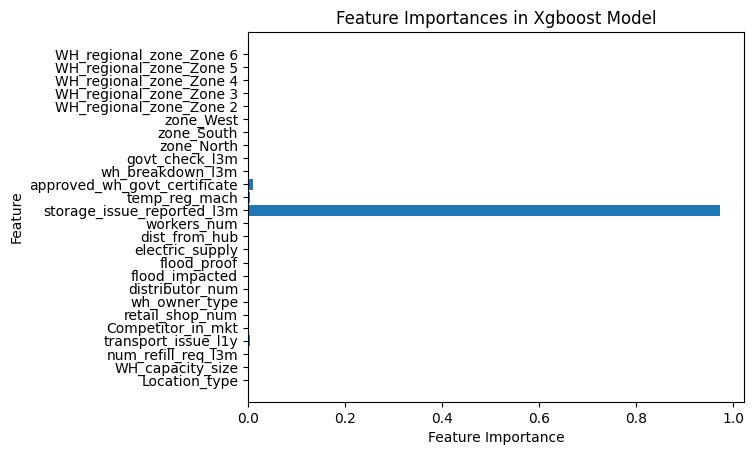

In [60]:
plt.barh(X.columns, xgb2_model.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances in Xgboost Model")
plt.show()

**Results**
* There was not much difference in model results between scaled data and unscaled data.
* XgBoost provided best results achieving a low rmse of 829.59 and R2 score of 0.9945.
* Storage issues was the most importanr feature. This may be due due to their impact on operational efficiency, product integrity, and inventory turnover. Frequent storage problems often indicate inadequate facilities or handling practices, leading to weight variations. This strong correlation highlights the importance of addressing storage conditions in supply chain optimization.








